In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
theta = 30 *np.pi/180
alpha = 2.5e-4
h = 300

In [3]:
1/np.tan(.001*np.pi/180)

57295.77950726455

In [4]:
def b_horizontal(h,theta,alpha):
    return h*np.tan(theta+alpha)-h*np.tan(theta-alpha)
def b_vertical(h,theta_d,theta_w,alpha):
    return h*np.tan(theta_d)*(np.tan(90*np.pi/180-theta_d-theta_w + alpha) -\
                              np.tan(90*np.pi/180- theta_d-theta_w - alpha))

In [5]:
# d_nadir
b_nadir = 2*h*np.tan(alpha)
# d_theta
b_theta = h*np.tan(theta+alpha)-h*np.tan(theta-alpha)

In [6]:
# Vertical at ground level max d (h*tan(30))
d_max = h*np.tan(theta)
b_v = d_max*(np.tan(60*np.pi/180 + alpha) - np.tan(60*np.pi/180 - alpha))
b_v

0.3464102336826807

In [7]:
# Vertical where d = d_max/2 and theta = theta_max = 30deg
d = d_max/2

In [8]:
theta_d = 15*np.pi/180
d = h*np.tan(theta_d)
theta_w_arr = np.arange(0,15)*np.pi/180
height = h-h*np.tan(theta_d)/np.tan(theta_d+theta_w_arr)
b_v = b_vertical(h,theta_d,theta_w_arr,alpha)

Text(0, 0.5, 'height (m)')

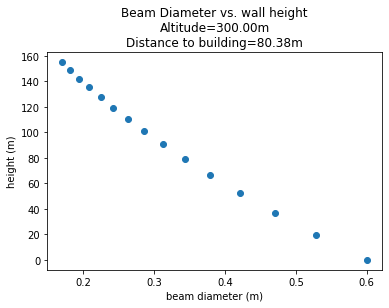

In [9]:
plt.plot(b_v,height,'o')
plt.title("Beam Diameter vs. wall height\nAltitude={:2.2f}m\nDistance to building={:2.2f}m".format(h,d))
plt.xlabel("beam diameter (m)")
plt.ylabel("height (m)")

Text(0, 0.5, 'height (m)')

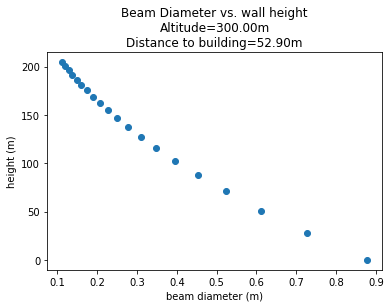

In [10]:
theta_d = 10*np.pi/180
d = h*np.tan(theta_d)
theta_w_arr = np.arange(0,20)*np.pi/180
height = h-h*np.tan(theta_d)/np.tan(theta_d+theta_w_arr)
b_v = b_vertical(h,theta_d,theta_w_arr,alpha)
plt.plot(b_v,height,'o')
plt.title("Beam Diameter vs. wall height\nAltitude={:2.2f}m\nDistance to building={:2.2f}m".format(h,d))
plt.xlabel("beam diameter (m)")
plt.ylabel("height (m)")

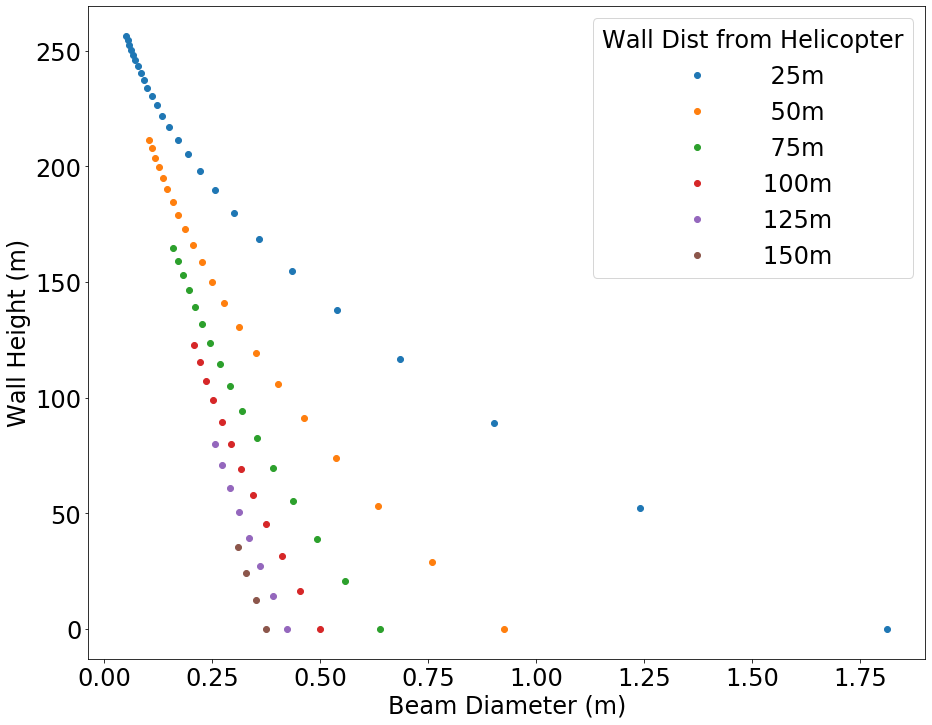

In [11]:
plt.figure(figsize=[15,12])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
fsize = 24
a = []
for d in [25,50,75,100,125,150]:
    theta_d = np.arctan(d/h)
    theta_w_arr = np.arange(0,30-(theta_d*180/np.pi))*np.pi/180
    height = h-h*np.tan(theta_d)/np.tan(theta_d+theta_w_arr)
    b_v = b_vertical(h,theta_d,theta_w_arr,alpha)
    plt.plot(b_v,height,'o',label="{:6.0f}m".format(d))
#     plt.title("Beam Diameter vs. Wall Height\nOperating Scanner Range: 0-30 degrees from nadir\nHelicopter Altitude={}m\nLaser Beam Divergence: 0.5mrad".format(h),fontsize=18)
    plt.xlabel("Beam Diameter (m)",fontsize=fsize)
    plt.ylabel("Wall Height (m)",fontsize=fsize)
    plt.legend(title="Wall Dist from Helicopter",title_fontsize=fsize,fontsize=fsize)
    plt.xticks(fontsize=fsize)
    plt.yticks(fontsize=fsize)
    [a.append((d,b,h)) for b,h in zip(b_v,height)]
    

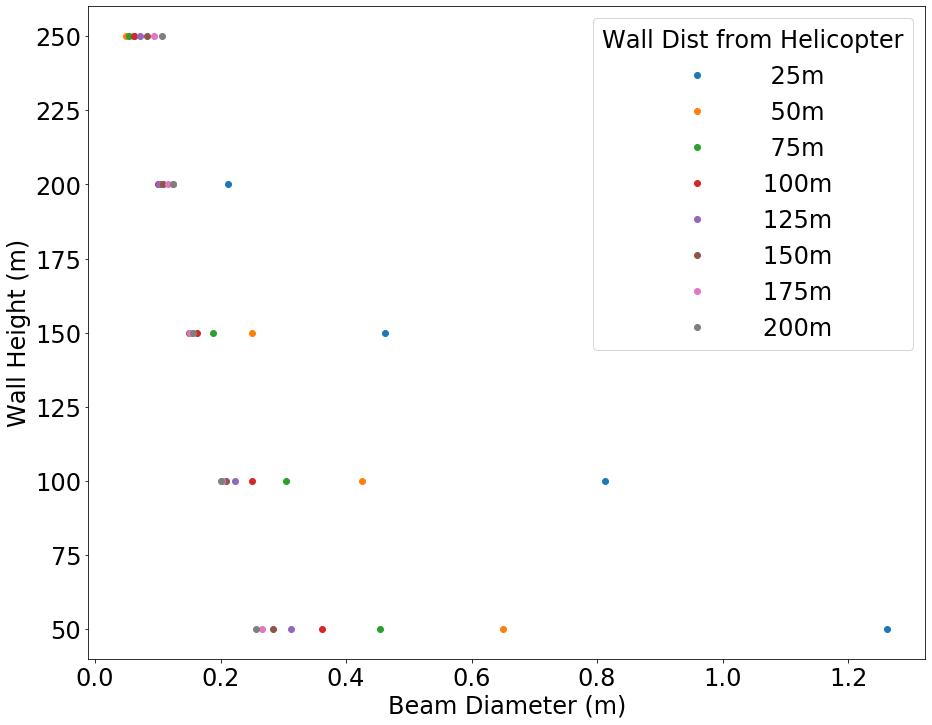

In [12]:
# Fixed wall height
plt.figure(figsize=[15,12])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
fsize = 24

a = 300
d_list = [25,50,75,100,125,150,175,200]
w_list = list(np.arange(50,300,50))
alpha = 2.5e-4

b_v = np.zeros([len(d_list),len(w_list)])
b_v_flat = []
for i,d in enumerate(d_list):
    theta_h = np.arctan(d/a)
    for j,w in enumerate(w_list):
        theta_w = np.arctan(np.tan(theta_h)/(1-w/a))-theta_h
        b_v[i,j] = b_vertical(a,theta_h,theta_w,alpha)
        key_str = "Height: {}\tOffset: {}".format(d,w)
        b_v_flat.append([d,w,b_vertical(a,theta_h,theta_w,alpha)])

    plt.plot(b_v[i,:],w_list,'o',label="{:6.0f}m".format(d))
#     plt.title("Beam Diameter vs. Wall Height\nOperating Scanner Range: 0-30 degrees from nadir\nHelicopter Altitude={}m\nLaser Beam Divergence: 0.5mrad".format(h),fontsize=18)
    plt.xlabel("Beam Diameter (m)",fontsize=fsize)
    plt.ylabel("Wall Height (m)",fontsize=fsize)
    plt.legend(title="Wall Dist from Helicopter",title_fontsize=fsize,fontsize=fsize)
    plt.xticks(fontsize=fsize)
    plt.yticks(fontsize=fsize)
    

In [13]:
[print("{},{},{}".format(bb[0],bb[1],bb[2])) for bb in b_v_flat]

25,50,1.2625079169772842
25,100,0.8125032669405561
25,150,0.4625010502629755
25,200,0.21250021692735815
25,250,0.06250001692710837
50,50,0.6500010291685676
50,100,0.4250004338547164
50,150,0.2500001458335177
50,200,0.12500003385421676
50,250,0.050000004166655954
75,50,0.4541669915223867
75,100,0.3041668081888549
75,150,0.18750005078132514
75,200,0.10416668041085542
75,250,0.054166669299765546
100,50,0.36250014915388823
100,100,0.2500000677084336
100,150,0.16250002623698914
100,200,0.10000000833333413
100,250,0.06250000227864817
125,50,0.3125000846355419
125,100,0.22250004023552372
125,150,0.1525000169020907
125,200,0.10250000623540645
125,250,0.07250000223540942
150,50,0.28333338842605477
150,100,0.20833336082171086
150,150,0.15000001249995124
150,200,0.1083333385994978
150,250,0.08333333564814473
175,50,0.2660714680522535
175,100,0.20178573496185123
175,150,0.15178572441764124
175,200,0.11607143335836677
175,250,0.09464285959744077
200,50,0.25625003036293664
200,100,0.2000000166666237

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [14]:
for row in a:
    print("{},{},{}".format(row[0],row[1],row[2]))

TypeError: 'int' object is not iterable

(array([0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
 <a list of 7 Text yticklabel objects>)

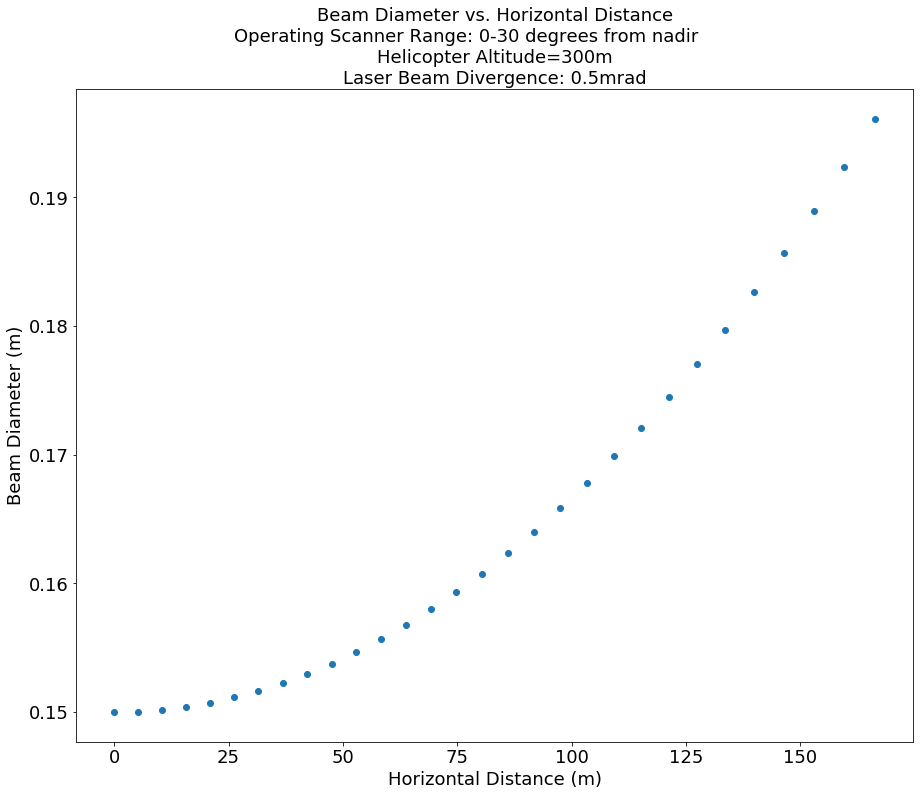

In [15]:
plt.figure(figsize=[15,12])
theta_d_arr = np.arange(0,30)*np.pi/180
d = h*np.tan(theta_d_arr)
b_h = b_horizontal(h,theta_d_arr,alpha)
plt.plot(d,b_h,'o')
plt.title("Beam Diameter vs. Horizontal Distance\nOperating Scanner Range: 0-30 degrees from nadir\
          \nHelicopter Altitude={}m\nLaser Beam Divergence: 0.5mrad".format(h),fontsize=18)
plt.ylabel("Beam Diameter (m)",fontsize=18)
plt.xlabel("Horizontal Distance (m)",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


In [16]:
# Beam divergence horiz vs verti
a = 300
d = 100
alpha = 2.5e-4
w = 30
def b_horizontal(h,theta,alpha):
    return h*np.tan(theta+alpha)-h*np.tan(theta-alpha)
def b_vertical(h,theta_d,theta_w,alpha):
    return h*np.tan(theta_d)*(np.tan(90*np.pi/180-theta_d-theta_w + alpha) -\
                              np.tan(90*np.pi/180- theta_d-theta_w - alpha))

theta_h = np.arctan(d/a)
theta_w = np.arctan((a-w)/d)-(90*np.pi/180)+theta_h

In [17]:
print("Beam width on horizontal, base of wall: {:2.4f}m".format(b_horizontal(a,theta_h,alpha)))
print("Beam width on vertical wall at ground level: {:2.4f}m".format(b_vertical(a,theta_h,alpha,alpha)))
print("Beam width on vertical wall: {:2.4f}m".format(b_vertical(a,theta_h,theta_w,alpha)))

Beam width on horizontal, base of wall: 0.1667m
Beam width on vertical wall at ground level: 0.4993m
Beam width on vertical wall: 0.6164m


In [ ]:
.6164/0.4993

## Flight parameters chart

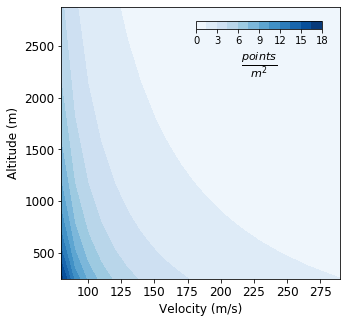

In [18]:
# Contour map
fontsize=12
altitude = np.arange(250, 3000,125)
vel = np.arange(80,300,10)
h = np.array([400000/(2*np.tan(30*np.pi/180)*altitude*v) for v in vel])

fig = plt.figure(figsize=[5,5])
plt.contourf(vel,altitude,h,15,cmap='Blues')

plt.ylabel("Altitude (m)",fontsize=fontsize)
plt.xlabel("Velocity (m/s)",fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

cbaxes = fig.add_axes([0.5, 0.82, 0.35, 0.02])
plt.colorbar(cax=cbaxes,orientation='horizontal', pad=0.15).set_label(label=r"$\frac{points}{m^2}$",fontsize=16)


plt.show()

In [19]:
# 3D Plot
from mpl_toolkits import mplot3d

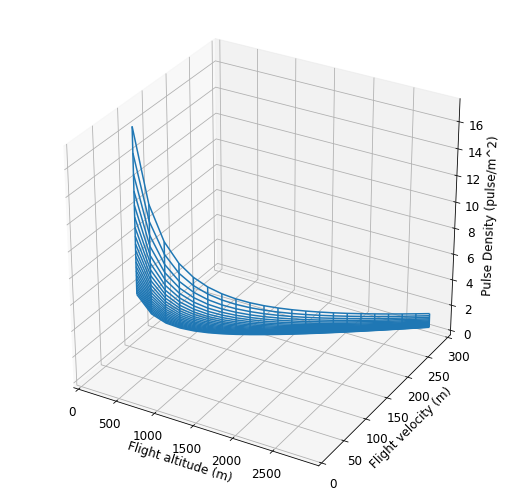

In [20]:
# fontsize=14

fig = plt.figure(figsize=[9,9])
ax = plt.axes(projection='3d')

# ax.contour3D(altitude,vel,h, 50,cmap='coolwarm')
ax.plot_wireframe(altitude,vel,h,rcount=1000,ccount=1000)

ax.set_xticks(np.arange(0,3000,500))
ax.set_xticklabels(np.arange(0,3000,500),fontsize= fontsize)
ax.set_xlabel('Flight altitude (m)',fontsize=fontsize)

ax.set_yticks(np.arange(0,301,50))
ax.set_yticklabels(np.arange(0,301,50),fontsize= fontsize)
ax.set_ylabel('Flight velocity (m)',fontsize=fontsize)

ax.set_zticks(np.arange(0,18,2))
ax.set_zticklabels(np.arange(0,18,2),fontsize= fontsize)
ax.set_zlabel('Pulse Density (pulse/m^2)',fontsize=fontsize)
plt.show()

##### np.flip(vel)

## Densities chart

In [21]:
# Eq14-15
theta_l = .001*np.pi/180
a = 300
theta_h = np.arange(0,30)*np.pi/180

rho_N = a / np.tan(theta_l)
rho_H = np.cos(theta_h)**2
rho_V = rho_H * np.tan(theta_h+theta_l)

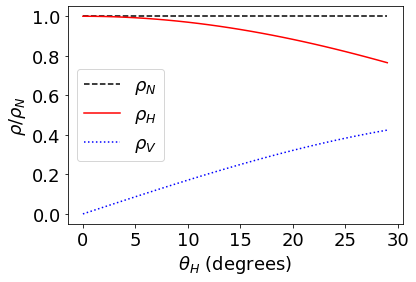

In [22]:
th_label = r'$\rho_H$'
tv_label = r'$\rho_V$'
tn_label = r'$\rho_N$'
ylabel = r'$\rho / \rho_N$'
xlabel = r'$\theta_H$ (degrees)'
plt.plot(theta_h*180/np.pi,np.ones(len(theta_h)),'--k',label=tn_label)
plt.plot(theta_h*180/np.pi,rho_H,'-r',label=th_label)
plt.plot(theta_h*180/np.pi,rho_V,':b',label=tv_label)

plt.ylabel(ylabel,fontsize=18)
plt.xlabel(xlabel,fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


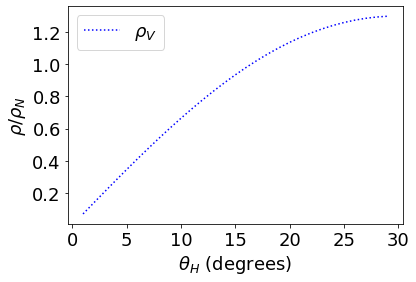

In [23]:
# theta_w = np.arange(0,30-(theta_h*180/np.pi))*np.pi/180
theta_w = np.arange(0,30)*np.pi/180
rho_W = rho_V * (np.sin(theta_h+theta_w)**2)/(np.sin(theta_h)**2)
tw_label = r'$\rho_W$'

plt.plot(theta_h*180/np.pi,rho_W,':b',label=tv_label)
plt.ylabel(ylabel,fontsize=18)
plt.xlabel(xlabel,fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

## rho_W chart

In [24]:
# Generate rho_w/rho_v
a = 300
theta_l = 0.002 * np.pi/180
d = np.arange(25,251,1)
w = np.arange(5,101,1)

def calc_rho_w(d,w,rho_n=1,a=300,theta_l=0.002*np.pi/180):
    theta_h = np.arctan(d/a)
    theta_w = np.zeros([theta_h.shape[0],len(w)])
    for i,th in enumerate(theta_h):
        for j,wh in enumerate(w):
            theta_w[i,j] = np.arctan(np.tan(th)/(1-wh/a))-th


    rho_w = np.zeros(theta_w.shape)
    for i,h in enumerate(theta_h):
        rho_w[i,:] = np.tan(h+theta_l)*np.sin(h+theta_w[i,:])**2 \
            /(np.tan(h)**2)
    
    return rho_w*rho_n

# rho_w = calc_rho_w(np.array([100,150]),np.array([30,45]),a,theta_l)
rho_w = calc_rho_w(d,w,76,a,theta_l)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text yticklabel objects>)

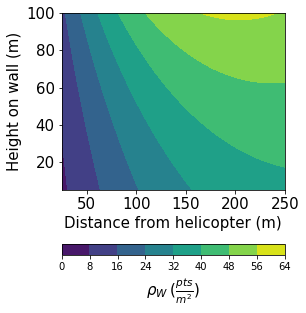

In [25]:
xlabel = 'Distance from helicopter (m)'
ylabel = 'Height on wall (m)'
fontsize = 15

plt.figure(figsize=[4,5])
plt.contourf(d,w,rho_w.T)
plt.colorbar(orientation='horizontal',pad=0.2).set_label(label=r"$\rho_W \: (\frac{pts}{m^2})$",fontsize=fontsize)

plt.ylabel(ylabel,fontsize=fontsize)
plt.xlabel(xlabel,fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

## Predicted intensity at wall heights

In [26]:
a = 300
d = 97
alpha = 2.5e-4
theta_h = np.arctan(d/a)

w = np.arange(0,31,3)
theta_w = np.arctan(np.tan(theta_h)/(1-w/a))-theta_h

b_v = b_vertical(a,theta_h,theta_w,alpha)

In [27]:
intensity_ratio = (b_v[5]/b_v)**2
for j,i in enumerate(np.arange(0,31,3)):
    print("{},{:2.4f}".format(i,intensity_ratio[j]))

0,0.8312
3,0.8620
6,0.8942
9,0.9279
12,0.9631
15,1.0000
18,1.0386
21,1.0791
24,1.1215
27,1.1659
30,1.2125


In [28]:
w

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30])

## Predicted density by wall height

In [57]:
a = 300
d = 68
alpha = 2.5e-4
theta_h = np.arctan(d/a)
w = np.arange(0,31,3)
theta_w = np.arctan(np.tan(theta_h)/(1-w/a))-theta_h

rho_w = (np.sin(theta_h+theta_w)**2)/(np.sin(theta_h)**2)

In [58]:
[print(r/rho_w[1]) for r in rho_w[1:]]

1.0
1.019470678673402
1.0395050669055488
1.060124703087886
1.0813521415508627
1.103211009174312
1.1257260656035895
1.1489232673267327
1.1728298358874583
1.1974743305299005


[None, None, None, None, None, None, None, None, None, None]

## Math for Dataset section of paper

In [29]:
a = []
d=100
h = 300

theta_d = np.arctan(d/h)

w = 20
# theta_w is angle from base of wall to point on wall
theta_w = np.pi/2-theta_d - np.arctan((h-w)/d)

Rw = np.sin(theta_d)**2/(np.sin(theta_d+theta_w)**2)*17.5
Rw
# height = h-h*np.tan(theta_d)/np.tan(theta_d+theta_w_arr)
# b_v = b_vertical(h,theta_d,theta_w_arr,alpha)
# plt.plot(b_v,height,'o',label="{:6.0f}m".format(d))
# #     plt.title("Beam Diameter vs. Wall Height\nOperating Scanner Range: 0-30 degrees from nadir\nHelicopter Altitude={}m\nLaser Beam Divergence: 0.5mrad".format(h),fontsize=18)
# plt.xlabel("Beam Diameter (m)",fontsize=fsize)
# plt.ylabel("Wall Height (m)",fontsize=fsize)
# plt.legend(title="Wall Dist from Helicopter",title_fontsize=fsize,fontsize=fsize)
# plt.xticks(fontsize=fsize)
# plt.yticks(fontsize=fsize)
# [a.append((d,b,h)) for b,h in zip(b_v,height)]

15.469999999999999

In [30]:
v = 25 # m/s
h = 300 # m
theta_h = 30*np.pi/180 #radians
f = 300000 # pts/s
A_scanned = 2*h*np.tan(theta_h)*v # m^2
rho = f/A_scanned
rho

34.641016151377556

In [31]:
v = 25 # m/s
h = 300 # m
theta_h = 30*np.pi/180 #radians
f = 300000 # pts/s
theta_l = 0.002*np.pi/180

rho_along = (f/(theta_h/theta_l))/v
rho_across = 1/(h*np.tan(theta_l))

In [32]:
rho_along

0.8000000000000002

In [33]:
rho_across

95.49296581635211

In [34]:
rho = rho_across*rho_along

In [35]:
rho

76.3943726530817

In [36]:
theta_h2 = np.arctan(1/3) # at d=100m, not max theta_h
rho* np.cos(theta_h2)**2

68.75493538777353

In [37]:
np.cos(theta_h2)**2 * rho * (1/3)*1.2

27.501974155109412

In [38]:
np.arctan(1/3)*180/np.pi

18.43494882292201

In [39]:
a = 300
w = 30
theta_h2 = np.arctan(1/3) # at d=100m, not max theta_h
theta_w = np.arctan(np.tan(theta_h2)/(1-w/a))-theta_h2
theta_w*180/np.pi

1.8881880067409327

In [40]:
np.sin(theta_h2+theta_w)**2/np.sin(theta_h2)**2

1.2062726176115806

In [41]:
(np.sin(theta_h2+theta_w)**2 * np.tan(theta_h2+theta_l)*np.cos(theta_h2)**2  ) \
/(np.sin(theta_h2)**2) * rho

27.64894872571727

In [42]:
from sklearn.metrics import r2_score

In [43]:
y =  [
1668, 
1730 ,
1796 ,
1864 ,
1935 ,
2010 ,
2088 ,
2170, 
2256 ]

x = [
1668, 
1836 ,
1911 ,
1915 ,
1936 ,
1941 ,
1956 ,
1943 ,
1947 
]
r2_score(x,y)

-1.8780396399684554

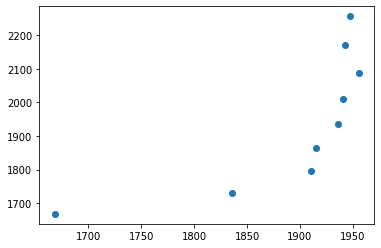

In [44]:
plt.scatter(x,y)

In [ ]:
y